In [1]:
# Plot PKR variants made in each window
# Figures 2D and 5D

In [11]:
import os
import pandas as pd
from scipy.stats import f_oneway,tukey_hsd,ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42  # Makes text editable
plt.rcParams['ps.fonttype'] = 42   # For PostScript backend as well

In [12]:
# figure save directory
save_dir = "../../results/figures/pkr-variants"
os.makedirs(save_dir, exist_ok=True)

In [13]:
input_file = '../../results/barseq/pkr-variant-reads_240228.csv'
df = pd.read_csv(input_file)

def pkr_type(x, pkr_stop = 551):
    if x[-1] == "*" and int(x.split('-')[1][1:-1]) < pkr_stop:
        return "Nonsense"
    elif x[-2:] == 'WT':
        return "WT"
    else:
        return 'Variant'
df['pkr_type'] = df['pkr'].apply(pkr_type)

In [15]:
# var categories
aa_pos = ['H','K','R']
aa_neg = ['D','E']
aa_neutral = ['C','N','Q','S','T']
aa_nonpolar = ['A','I','L','M','V']
aa_aromatic = ['F','W','Y']
aa_unique = ['G','P']
aa_stop = ['*']

full_list = [aa_pos,aa_neg,aa_neutral,aa_nonpolar,aa_aromatic,aa_unique,aa_stop]
aa_categories = ['Positive Charge','Negative Charge','Polar-Neutral','Non-Polar','Aromatic','Unique','Stop']

aa_dict = {key:value for key,value in zip(aa_categories,full_list)}

def map_aa(value):
    for key, values_list in aa_dict.items():
        if value in values_list:
            return key
    return None

df['wt_cat'] = df.loc[:, 'wt_aa'].apply(map_aa)
df['var_cat'] = df.loc[:, 'var_aa'].apply(map_aa)

In [35]:
# barchart of variants by region and variant type
temp_df = df.query('k3 == "K3L-WT"').groupby('pkr_regions')['var_cat'].value_counts().reset_index()

region_dict = {'Region 1':'α0/β1', 'Region 2':'αD', 'Region 3':'Activation Loop','Region 4':'αG'}
temp_df['pkr_regions'] = temp_df['pkr_regions'].map(region_dict)

color_dict = {'α0/β1':'#F0B142', 'αD':'#E06B37','Activation Loop':'#C9397D','αG':'#722758'}

temp_df.head()

,pkr_regions,var_cat,count
0,α0/β1,Non-Polar,49
1,α0/β1,Polar-Neutral,40
2,α0/β1,Positive Charge,19
3,α0/β1,Negative Charge,13
4,α0/β1,Aromatic,9


In [46]:
temp_df.groupby('pkr_regions')['count'].sum()


pkr_regions
Activation Loop     43
α0/β1              140
αD                  86
αG                 161
Name: count, dtype: int64

In [ ]:
# total variants
temp_df.groupby('pkr_regions')['count'].sum().sum()

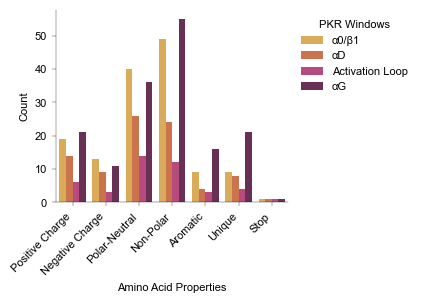

In [43]:
# make barchart plot

# plot parameters
width_in = 3 #2
height_in = 2.5
font_size = 8
font = 'Arial'
stroke = .25
tick_len = 3
alpha_val = .2
marker_diameter = 3
ymin = -5
ymax=5.9

font = {'family': font, 'size': font_size}
plt.rc('font', **font)

plt.rc('lines', linewidth=stroke)

plt.figure(figsize=(width_in, height_in)) # save size

# colors for region

ax = sns.barplot(
    data=temp_df, 
    x="var_cat", 
    y="count", 
    hue="pkr_regions",
    palette=color_dict,
    order = aa_categories
)

# modify plot spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_linewidth(stroke)
ax.spines['bottom'].set_linewidth(stroke)



# Set major tick length
ax.tick_params(axis='both', direction='out', length=tick_len, width=stroke)
plt.gca().yaxis.set_tick_params(width=stroke, which='both', direction='out')

# x labels
plt.xlabel('Amino Acid Properties')
plt.xticks(rotation=45, ha='right')

# y labels
plt.ylabel('Count')

# legend
plt.legend(title='PKR Windows', frameon=False, bbox_to_anchor=(1.01, 1), loc='upper left')

# save plot
fig = ax.get_figure()
plot_name = f'pkr-variants.pdf'
output_file = os.path.join(save_dir, plot_name)
fig.savefig(output_file, format='pdf', transparent=True)
